# Prerequisite knowledge

## Import Package

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Log-log Plot

Given a monomial equation $y = a * x^k$, taking the logarithm of the equation (with any base(e.g. 10)) yields: 
$log_{10}(y) = k * log_{10}(x) + log_{10}(a)$

### Monomial equations in normal plot compared with log-log plot: $y = a * x^k$
1. $y = x$
2. $y = x^2$
3. $y = x^3$

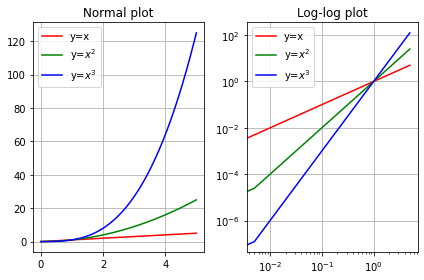

In [34]:
# Normal plot
x = np.linspace(0, 5, 1000)
y1 = x
y2 = x**2
y3 = x**3

fig = plt.figure()
plt.subplot(121)
plt.plot(x, y1, '-r', label='y=x')
plt.plot(x, y2, '-g', label='y=$x^2$')
plt.plot(x, y3, '-b', label='y=$x^3$')
plt.title('Normal plot')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(122)
plt.plot(x, y1, '-r', label='y=x')
plt.plot(x, y2, '-g', label='y=$x^2$')
plt.plot(x, y3, '-b', label='y=$x^3$')
plt.title('Log-log plot')
plt.legend(loc='upper left')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()